### импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

### Задаём экспоненциальное (показательное) распределение $\lambda e^{- \lambda x}$. Математическое ожидание равно $\lambda^{-1}$, дисперсия равна $\lambda^{-2}$. Возьмём $\lambda = 1$.

In [2]:
exp_rv = sts.expon(scale = 1)

### задаём выборку для этого распределения

In [3]:
sample = exp_rv.rvs(size=1000)

### строим гистограмму выборки и теоритическую плотность распределения

Text(0.5, 0, '$x$')

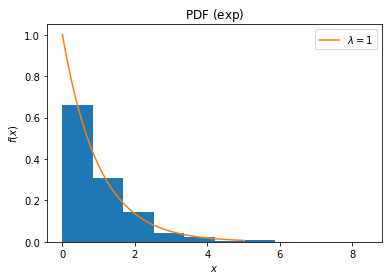

In [4]:
x = np.linspace(0, 5, 1000)
pdf = exp_rv.pdf(x)
plt.hist(sample, density=True)
plt.plot(x, pdf, label="$\lambda=%s$" % 1)
plt.legend()
plt.title("PDF ($\exp$)")
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

### сформируем 1000 выборок объёма n = 5, 20, 100

In [5]:
smpls5 = []
smpls20 = []
smpls100 = []
for i in range(1000):
    smpls5.append(exp_rv.rvs(size=5))
    smpls20.append(exp_rv.rvs(size=20))
    smpls100.append(exp_rv.rvs(size=100))

### посчитаем среднее арифметическое для каждой выборки, получим 1000 средних для каждого n

In [6]:
avrg5 = []
avrg20 = []
avrg100 = []
for j in smpls5:
    avrg5.append(np.mean(j))
for j in smpls20:
    avrg20.append(np.mean(j))
for j in smpls100:
    avrg100.append(np.mean(j))

### создадим нормальные распределения для выборочных средних при n = 5, 20, 100 соответственно

In [7]:
x = np.linspace(0, 3, 100)
norm5 = sts.norm(loc=1, scale=(1/5)**0.5)
pdf5 = norm5.pdf(x)
norm20 = sts.norm(loc=1, scale=(1/20)**0.5)
pdf20 = norm20.pdf(x)
norm100 = sts.norm(loc=1, scale=1/10)
pdf100 = norm100.pdf(x)

### построим гистограмму выборочных средних для n = 5

Text(0.5, 0, '$x$')

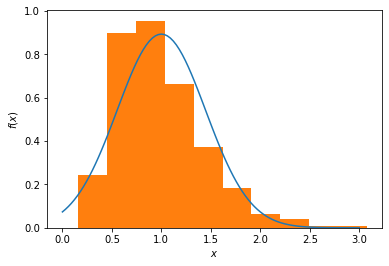

In [8]:
plt.plot(x, pdf5)
plt.hist(avrg5, density=True)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

### построим гистограмму выборочных средних для n = 20

Text(0.5, 0, '$x$')

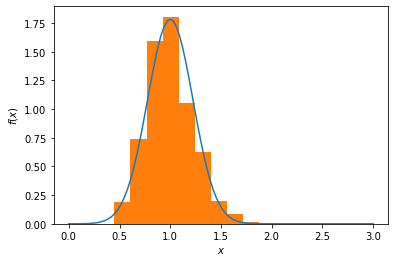

In [9]:
plt.plot(x, pdf20)
plt.hist(avrg20, density=True)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

### построим гистограмму выборочных средних для n = 100

Text(0.5, 0, '$x$')

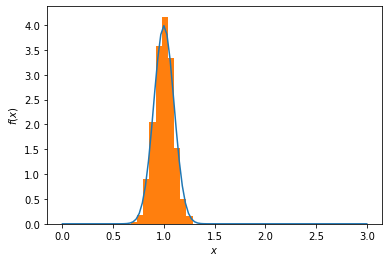

In [10]:
plt.plot(x, pdf100)
plt.hist(avrg100, density=True)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

## Выкладки с вычислениями параметров нормальных распределений

Математическое ожидание экспоненциального распределения равно $\lambda^{-1}$, а дисперсия равна $\lambda^{-2}$. C помощью Центральной предельной теоремы получаем, что выборочное среднее в нашем случае подчиняется распределению $N(\lambda^{-1}, \frac{\lambda^{-2}}{n})$. В нашем случае $\lambda = 1$.

### Для $n = 5$

$\\$ ~$N(1, \frac{1}{5})$. Соответственно для функции в python берём параметры $1$ и $\frac{1}{\sqrt{5}}$, так как необходимо брать не дисперсию, а стандартное отклонение.

### Для $n = 20$ 

$\\$ ~$N(1, \frac{1}{20})$. Соответственно для функции в python берём параметры $1$ и $\frac{1}{\sqrt{20}}$.

### Для $n = 100$ 

$\\$ ~$N(1, \frac{1}{100})$. Соответственно для функции в python берём параметры $1$ и $\frac{1}{10}$.

## Вывод

Видно, что гистограмма лучше соответствует теоретическому графику при больших n. То есть точность аппроксимации распределения выборочных средних нормальным распределением улучшается с ростом n. Таким образом, Центральная предельная теорема выполняется, и выборочные средние распределены в соответствии с ней.